In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **1. Loading dataset**

In [7]:
import sys
import os

# Add project root to sys.path
sys.path.append(os.path.abspath("..")) # go one level up

from src.utils.paths import PROCESSED_DATA_DIR
from src.utils.io import load_csv

df = load_csv(PROCESSED_DATA_DIR / "validated_df.csv")

In [8]:
#quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **2. Checking Missing Values:**

In [13]:
# Count missing per column
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### **3. Statistical Analysis by Churn**

In [18]:
# Group by Churn
churn_stats = df.groupby("Churn").describe().T
churn_stats

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000

**Insight:**
- Churn is more common among senior citizens, customers with shorter tenure, and those with higher monthly charges.
- These trends can help in targeting retention strategies for high-risk groups.

#### **4. Churn Distribution**

In [27]:
# Class count for Churn variable
churn_counts = df['Churn'].value_counts()

# Class percentage for Churn variable (normalize=True to get proportions)
churn_percent = df['Churn'].value_counts(normalize=True)*100

In [29]:
print('Churn Count: ', churn_counts)

Churn Count:  Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [34]:
print(f"Churn Percentage:", churn_percent)

Churn Percentage: Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


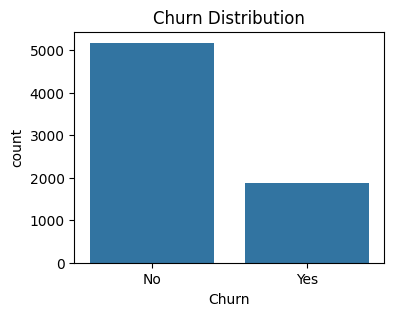

In [26]:
# visualization of churn distribution
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

#### **5. Univariate Analysis**
##### **5.1 Numerical Features**

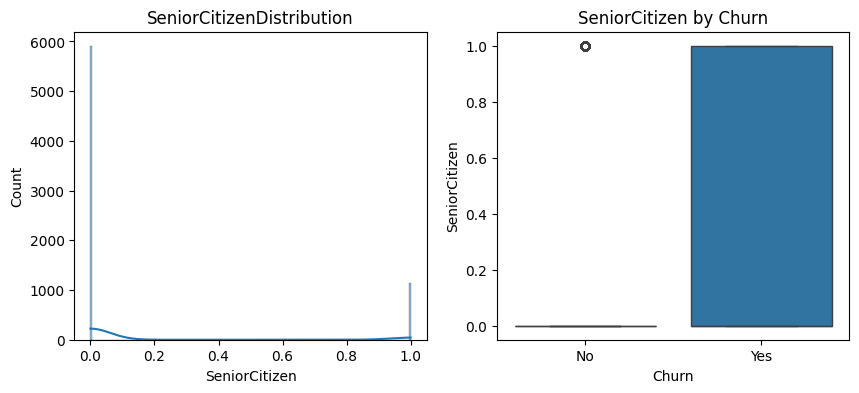

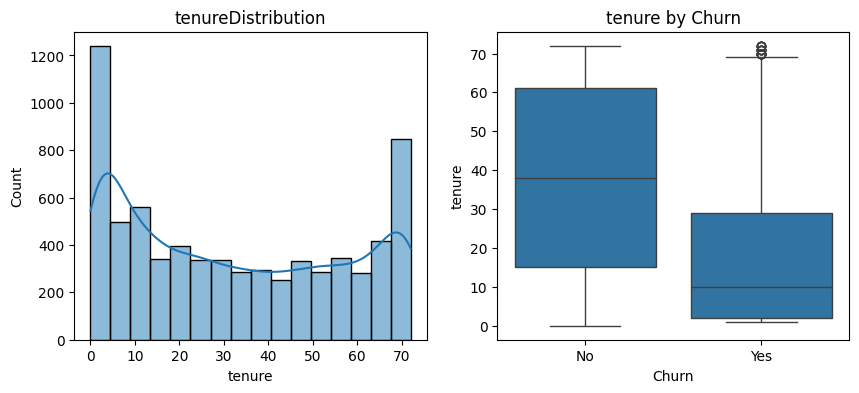

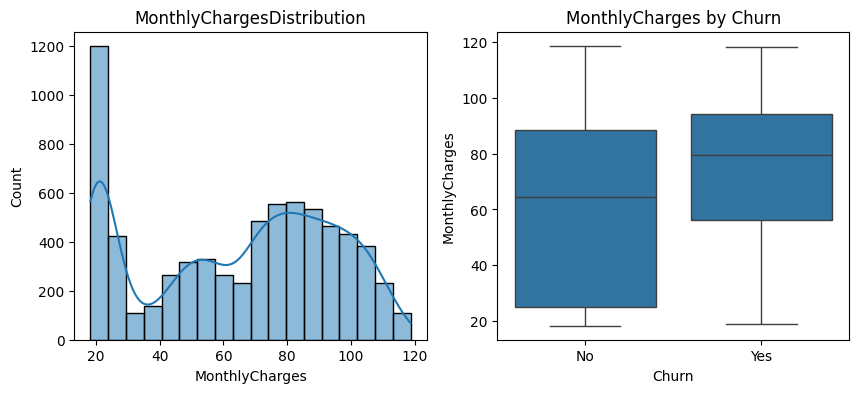

In [41]:
# Selecting all numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=np.number).columns

# loop through each numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # first histogram
    plt.subplot(1,2,1)

    # histogram with kde (density curve)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}Distribution')

    # Second boxplot comparing the column against 'Churn'
    plt.subplot(1,2,2)
    
    # boxplot - grouped by 'Churn' values
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')

    plt.show()




##### **5.2 Categorical Features**

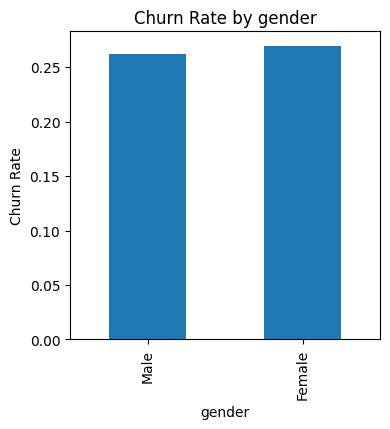

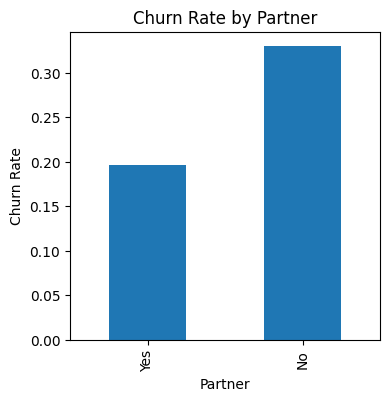

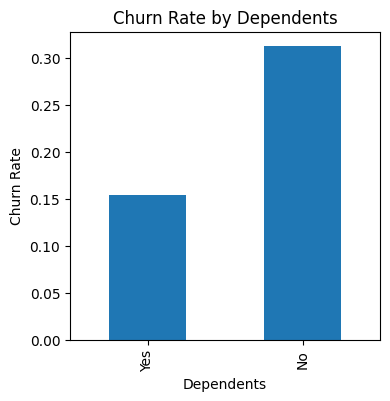

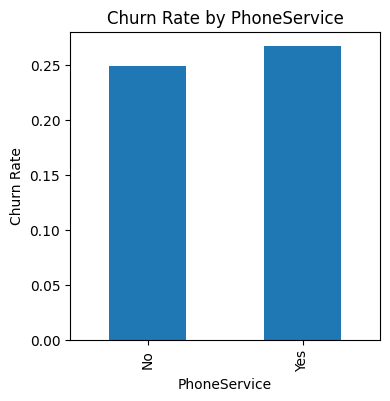

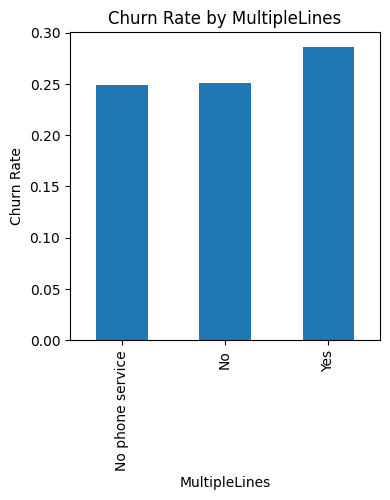

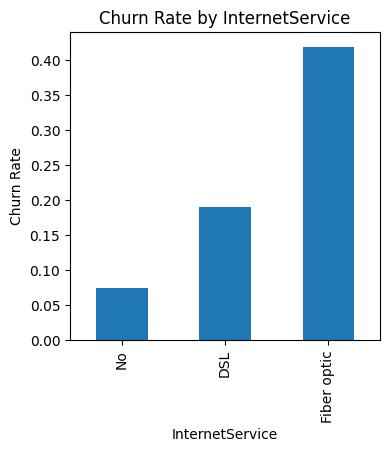

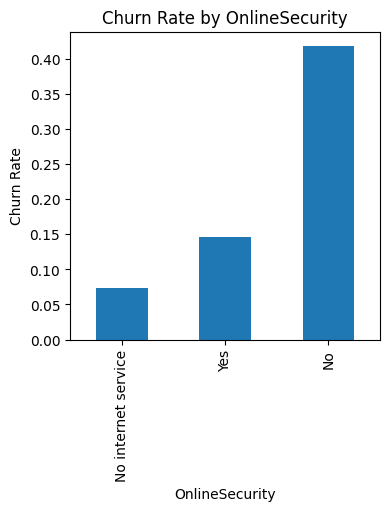

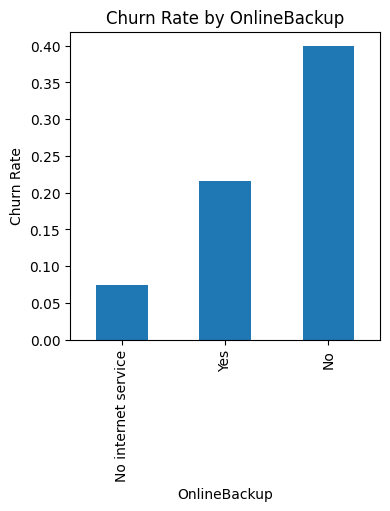

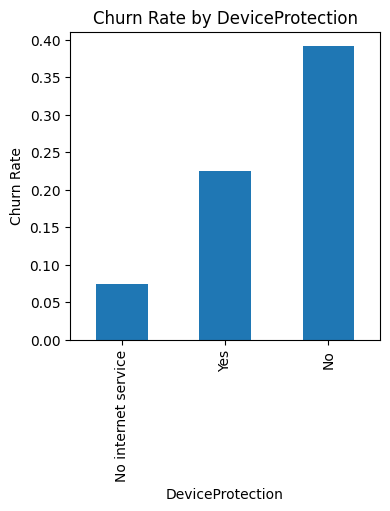

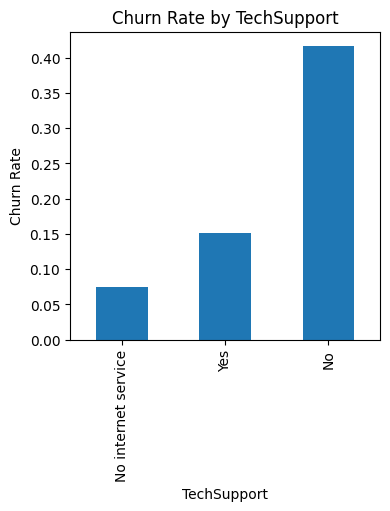

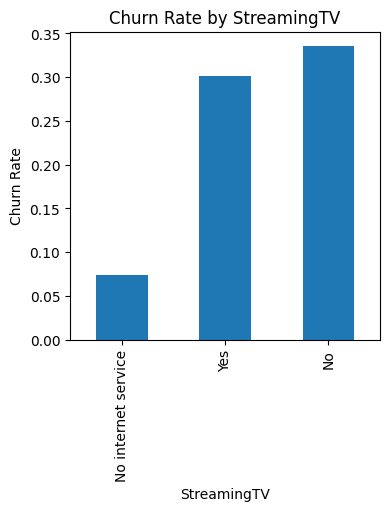

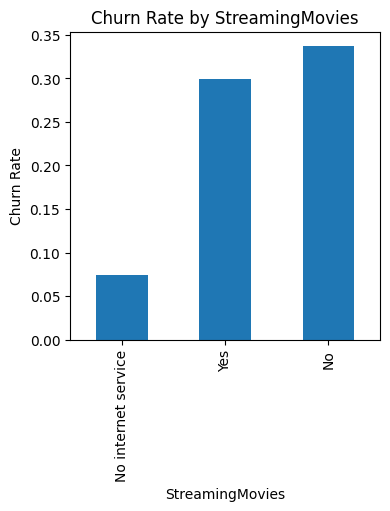

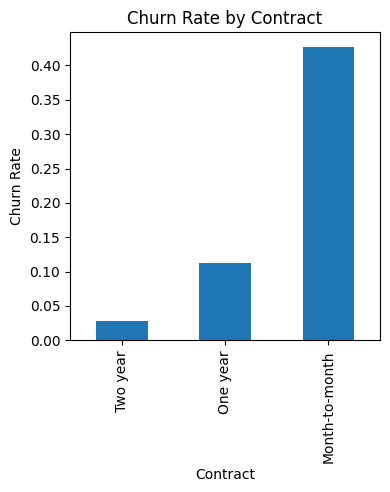

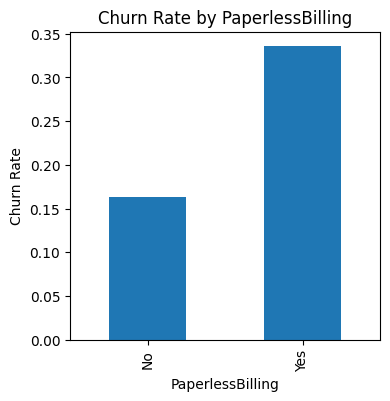

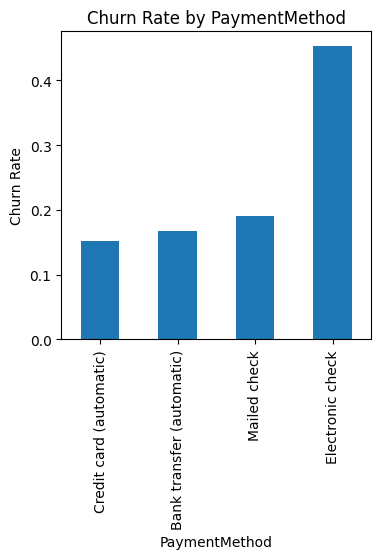

In [51]:
# Selecting all categorical columns except the target 'Churn'
categorical_cols = df.select_dtypes(include='object').columns.drop(['Churn', 'customerID', 'TotalCharges'])

# loop through each categorical column to analyze Churn
for col in categorical_cols:
    plt.figure(figsize=(4,4))
    
    # Group the data by the current categorical column
    # Count occurrences of each 'Churn' value within the group
    # normalize=True converts counts to proportions (percentage of each group)
    # unstack() reshapes so 'Churn' values become columns
    # fillna(0) replaces any missing values with 0 (e.g., if a category has no 'Yes')
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)

    # churn_rate with yes only and plotting it.
    churn_rate['Yes'].sort_values().plot(kind='bar')

    plt.ylabel('Churn Rate')
    plt.title(f'Churn Rate by {col}')
    plt.show()

#### **6. Bivariate Analysis**
##### **6.1 Correlation Matrix**

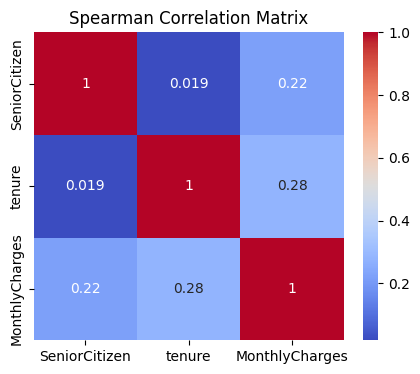

In [59]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(5,4))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

- Longer tenure slightly links to higher monthly charges.
- Senior citizens slightly pay more, but tenure and seniority aren’t really connected.
- Overall, these variables are only weakly related to each other.

#### **7. Time Based Analysis**

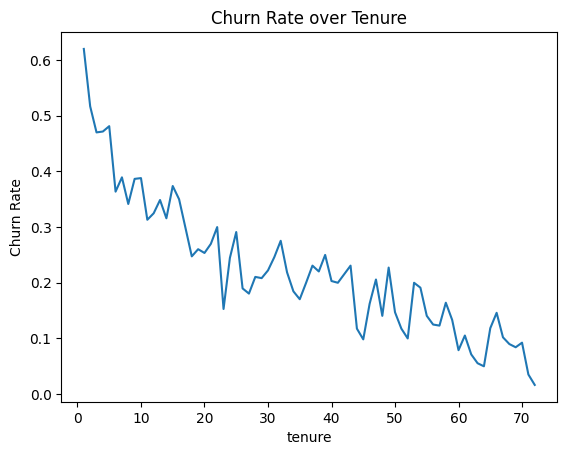

In [ ]:
# Churn trend over tenure
# group by - tenure and counting the churn rate with each tenure group.
# selecting only churn value (yes)
df.groupby("tenure")["Churn"].value_counts(normalize=True).unstack()["Yes"].plot()
plt.title("Churn Rate over Tenure")
plt.ylabel("Churn Rate")
plt.show()


* **0–5 months:** Highest churn (>60%)
* **0–20 months:** Rapid decline to under 30%
* **>20 months:** Gradual decrease, stabilizing around 10–20%
* **~70 months:** Nearly 0% churn (most loyal customers)